### **Importing libraries**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from keras.datasets import mnist

### **Loading MNIST dataset from keras**
*   It's a grayscale image just have one channel
*   The dimension for each image is 28 x 28



In [4]:
(x_train , y_train) , (x_test , y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# Shape of the data
print(f"x_train shape:{x_train.shape}\ny_train shape:{y_train.shape}")
print(f"x_test shape:{x_test.shape}\ny_test shape:{y_test.shape}")

x_train shape:(60000, 28, 28)
y_train shape:(60000,)
x_test shape:(10000, 28, 28)
y_test shape:(10000,)


In [9]:
# Show the first data point in Numpy format
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [25]:
# show the image
cv2_imshow(x_train[0])
print(f"the corresponding value in label: {y_train[0]}")

the corresponding value in label: 5


In [27]:
# The values which we have in labels
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [28]:
# Normalize the data
x_train = x_train/255
x_test = x_test/255

In [29]:
# Show the first data point in Numpy format after apply normalization
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### **Building the Neural Network**

In [40]:
# set the layers of the NN
Dense = tf.keras.layers.Dense
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             Dense(100 , activation = 'relu'),
                             Dense(50 , activation = 'relu'),
                             Dense(10 , activation = 'sigmoid')
])

In [43]:
# compiling th NN

model.compile(optimizer='Adam',
              loss='sparse_categorical_crossentropy')


In [44]:
# training the NN

model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0224
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0172
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0154
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0157
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0161
Epoch 6/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0124
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0122
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0120
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0110
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103


In [45]:
# The loss in Test data
loss = model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1235


### **Make a prediction for a single value**

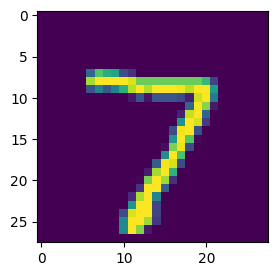

the corresponding value in label: 7


In [56]:
# show the first image in test data
plt.figure(figsize=(3,3))
plt.imshow(x_test[0])
plt.show()
print(f"the corresponding value in label: {y_test[0]}")

In [57]:
y_pred = model.predict(x_test)

313/313 [==============================] - 2s 4ms/step


In [69]:
# We use argmax to get the index which have the highest probability

print(y_pred[0])
print(f"The prediction label is: {np.argmax(y_pred[0])}")

[2.0592352e-06 8.0429518e-04 2.8823110e-01 8.7127757e-01 2.8697282e-04
 4.1506992e-05 1.1073002e-15 1.0000000e+00 5.0179767e-09 6.5504141e-02]
The prediction label is: 7


In [73]:
# apply the argmax for each value in y_pred to get the labels

y_pred_labels =np.array([np.argmax(i) for i in y_pred])
y_pred_labels.shape

(10000,)

### **Confusion matrix**

In [75]:
con_mat = tf.math.confusion_matrix(y_test , y_pred_labels)
con_mat

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    1,    1,    0,    0,    0,    2,    0,    2,    2],
       [   0, 1119,    2,    2,    0,    0,    4,    1,    6,    1],
       [   2,    6, 1004,    4,    1,    1,    2,    5,    7,    0],
       [   0,    0,    2,  986,    0,    5,    0,    4,    2,   11],
       [   1,    0,    5,    2,  954,    0,    3,    3,    2,   12],
       [   2,    0,    0,    6,    1,  866,    8,    1,    4,    4],
       [   3,    3,    0,    1,    3,    6,  938,    1,    3,    0],
       [   0,    4,    8,    6,    1,    0,    0, 1000,    1,    8],
       [   6,    1,    2,    4,    3,    6,    2,    3,  942,    5],
       [   1,    1,    1,    2,    7,    2,    0,    6,    1,  988]],
      dtype=int32)>

Text(0.5, 47.7222222222222, 'Predicted Labels')

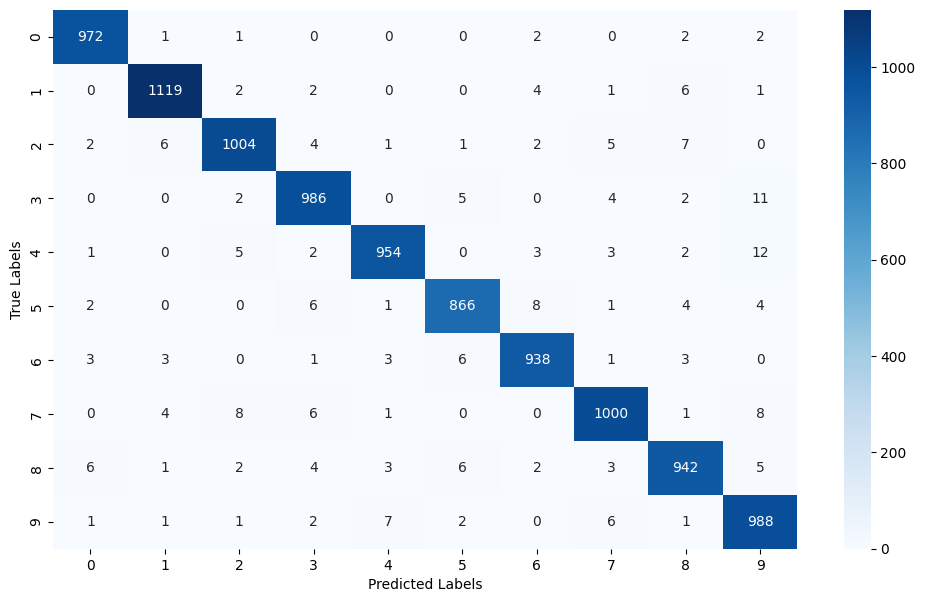

In [79]:
plt.figure(figsize=(12,7))
sns.heatmap(con_mat , annot = True , fmt ="d" , cmap ="Blues")
plt.ylabel("True Labels")
plt.xlabel("Predicted Labels")

### **Building a predictive system**


In [80]:
# Read the image using Opencv
input_img = cv2.imread('/content/MNIST digite.png')

In [84]:
print(input_img)

[[[190 190 190]
  [190 190 190]
  [190 190 190]
  ...
  [190 190 190]
  [190 190 190]
  [206 206 206]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 77  77  78]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 77  77  78]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 77  77  78]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [  0   0   0]
  [  0   0   0]
  [ 77  77  78]]

 [[251 251 251]
  [251 251 251]
  [251 251 251]
  ...
  [251 251 251]
  [251 251 251]
  [252 252 252]]]


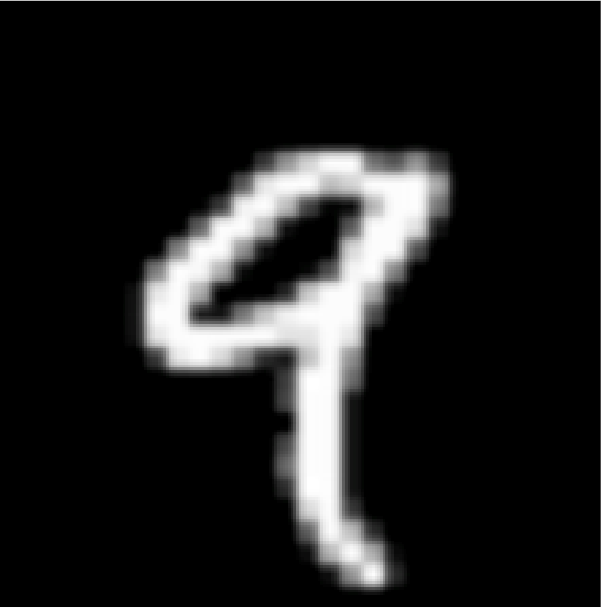

In [86]:
# display the input image
cv2_imshow(input_img)

In [88]:
# show the shape of the input image
input_img.shape

(608, 601, 3)

In [90]:
# convert color of the input image from BGR to Grayscale
Gray_img = cv2.cvtColor(input_img , cv2.COLOR_BGR2GRAY)
Gray_img.shape

(608, 601)

In [92]:
# resize of the input image
img = cv2.resize(Gray_img , (28,28))
img.shape

(28, 28)

In [93]:
cv2_imshow(img)

In [94]:
# Normalize the input image
img = img/255

In [96]:
# reshape the image
img = img.reshape((1,28,28))
img.shape

(1, 28, 28)

In [98]:
# Make a prediction for the input image
prediction = model.predict(img)
prediction

1/1 [==============================] - 0s 33ms/step


array([[4.9495880e-11, 4.1225530e-02, 2.1497843e-07, 6.8470459e-03,
        5.1197922e-01, 9.6839990e-08, 4.8115448e-15, 5.2996469e-03,
        4.3983902e-03, 9.9999994e-01]], dtype=float32)

In [100]:
digit = np.argmax(prediction)
print(f"The Handwritten digit is: {digit}")

The Handwritten digit is: 9
